In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

def evaluate_regression(y_test, y_pred, plot=True):
    """
    Compare regression predictions (y_pred) against true values (y_test).
    
    Args:
        y_test (array): True target values.
        y_pred (array): Predicted values.
        plot (bool): Whether to generate plots.
    
    Returns:
        dict: Metrics and plots.
    """
    # Calculate metrics
    metrics = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred),
        'Correlation': pearsonr(y_test, y_pred)[0],
        'Mean Absolute % Error': np.mean(np.abs((y_test - y_pred) / y_test)) * 100,
        'directional_accuracy': np.sum((np.diff(y_test) * np.diff(y_pred)) > 0) / (len(y_test) - 1) * 100
    }
    
    # Plot results
    if plot:
        plt.figure(figsize=(12, 5))
        
        # Plot 1: Actual vs Predicted
        plt.subplot(1, 2, 1)
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
        plt.xlabel('Actual Price')
        plt.ylabel('Predicted Price')
        plt.title('Actual vs Predicted')
        
        # Plot 2: Residuals
        plt.subplot(1, 2, 2)
        residuals = y_test - y_pred
        plt.hist(residuals, bins=30, edgecolor='black')
        plt.axvline(x=0, color='r', linestyle='--')
        plt.xlabel('Residuals (Actual - Predicted)')
        plt.title('Residual Distribution')
        
        plt.tight_layout()
        plt.show()
    
    return metrics

In [3]:
from core.data_loader import DataLoader
import os
import sys
from core.backtester import Backtester
from strategies.atr_breakout import ATRTrailingBreakout
from strategies.multi_momentum import MultiTimeframeMomentum
from strategies.vwap_reversion import VWAPReversion
from strategies.bb_rsi import BB_RSI
import logging
from datetime import datetime
import pandas as pd

# Налаштування логування
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Завантаження даних
loader = DataLoader()
data_file = 'btc_1m_apr25_askbid.parquet'
if os.path.exists(os.path.join('data', data_file)):
    logger.info("Завантаження даних...")
    df = loader.fetch_historical_bid_ask('SOLBTC', '1m', start_date='2025-04-01', end_date='2025-05-01')
else:
    df = loader.load_data(data_file)
df

INFO:__main__:Завантаження даних...


,open,high,low,close,volume,bid,ask
timestamp,,,,,,,
2025-04-01 00:00:00,0.001509,0.001510,0.001508,0.001508,623.891,0.001508,0.001508
2025-04-01 00:01:00,0.001508,0.001509,0.001508,0.001508,218.511,0.001508,0.001509
2025-04-01 00:02:00,0.001508,0.001509,0.001508,0.001509,6.793,0.001509,0.001509
2025-04-01 00:03:00,0.001509,0.001509,0.001509,0.001509,18.457,0.001509,0.001509
2025-04-01 00:04:00,0.001509,0.001510,0.001509,0.001510,60.760,0.001510,0.001511
...,...,...,...,...,...,...,...
2025-04-12 04:34:00,0.001471,0.001473,0.001467,0.001468,823.023,0.001468,0.001468
2025-04-12 04:35:00,0.001469,0.001469,0.001462,0.001462,598.863,0.001462,0.001462
2025-04-12 04:36:00,0.001462,0.001465,0.001462,0.001464,449.873,0.001464,0.001465


In [33]:
X[0]

array([0.0015078, 0.0015084, 0.0015087, 0.0015093, 0.0015104, 0.0015101,
       0.001509 , 0.0015108, 0.0015121, 0.0015121, 0.0015112, 0.0015106,
       0.00151  , 0.0015096, 0.0015084, 0.001508 , 0.0015082, 0.0015079,
       0.0015079, 0.0015108, 0.0015105, 0.0015103, 0.0015107, 0.0015109,
       0.0015111, 0.001511 , 0.001512 , 0.0015127, 0.0015128, 0.0015126,
       0.0015127, 0.0015135, 0.0015122, 0.0015129, 0.0015116, 0.0015123,
       0.0015124, 0.0015132, 0.0015127, 0.0015124, 0.0015128, 0.0015109,
       0.0015109, 0.0015104, 0.0015097, 0.0015101, 0.0015108, 0.0015089,
       0.0015082, 0.0015069])

In [38]:
y.iloc[0]

np.float64(0.0015038)

In [39]:
X[6][-1]

np.float64(0.0015038)

In [50]:
y.iloc[90:95].values

array([0.0015093, 0.0015089, 0.0015087, 0.0015087, 0.0015086])

In [49]:
X[100]

array([0.0015024, 0.0015025, 0.0015029, 0.0015029, 0.0015032, 0.0015066,
       0.001507 , 0.0015069, 0.0015071, 0.0015064, 0.0015079, 0.0015081,
       0.0015076, 0.0015068, 0.0015063, 0.0015073, 0.001507 , 0.0015065,
       0.0015065, 0.0015056, 0.001506 , 0.0015059, 0.0015067, 0.0015067,
       0.0015076, 0.0015078, 0.0015084, 0.0015088, 0.0015091, 0.001509 ,
       0.0015097, 0.0015089, 0.0015083, 0.0015089, 0.0015091, 0.0015097,
       0.0015102, 0.0015101, 0.0015103, 0.00151  , 0.0015088, 0.0015096,
       0.001508 , 0.0015084, 0.0015094, 0.0015093, 0.0015089, 0.0015087,
       0.0015087, 0.0015086])

In [46]:
# Create sequences (sliding window)
sequence_length = 50  # Use past 50 candles to predict future
N = 5 
X, y = [], []
y_indices = []

for i in range(len(df) - sequence_length - N):
    X.append(df['close'].iloc[i:i+sequence_length])  # Input: Past 50 candles (OHLCV) not included
    y.append(df['close'].iloc[i+sequence_length + N])  # Target: Future close price included
    y_indices.append(df.index[i+sequence_length + N])

X = np.array(X)
y = pd.Series(y, index=y_indices)

# Train-test split (time-series aware)
split = int(0.5 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
print(X_test.shape)
y_test

(8032, 50)


2025-04-06 14:47:00    0.001394
2025-04-06 14:48:00    0.001395
2025-04-06 14:49:00    0.001396
2025-04-06 14:50:00    0.001396
2025-04-06 14:51:00    0.001397
                         ...   
2025-04-12 04:34:00    0.001468
2025-04-12 04:35:00    0.001462
2025-04-12 04:36:00    0.001464
2025-04-12 04:37:00    0.001466
2025-04-12 04:38:00    0.001465
Length: 8032, dtype: float64

In [5]:
X_test.shape

(8032, 50)

In [6]:
X_test

array([[0.0013939, 0.0013938, 0.0013959, ..., 0.001393 , 0.0013914,
        0.0013907],
       [0.0013938, 0.0013959, 0.0013941, ..., 0.0013914, 0.0013907,
        0.0013917],
       [0.0013959, 0.0013941, 0.0013943, ..., 0.0013907, 0.0013917,
        0.0013928],
       ...,
       [0.0014464, 0.0014466, 0.0014469, ..., 0.0014542, 0.0014554,
        0.0014553],
       [0.0014466, 0.0014469, 0.0014474, ..., 0.0014554, 0.0014553,
        0.0014793],
       [0.0014469, 0.0014474, 0.0014474, ..., 0.0014553, 0.0014793,
        0.0014692]])

In [7]:
y_test

2025-04-06 14:47:00    0.001394
2025-04-06 14:48:00    0.001395
2025-04-06 14:49:00    0.001396
2025-04-06 14:50:00    0.001396
2025-04-06 14:51:00    0.001397
                         ...   
2025-04-12 04:34:00    0.001468
2025-04-12 04:35:00    0.001462
2025-04-12 04:36:00    0.001464
2025-04-12 04:37:00    0.001466
2025-04-12 04:38:00    0.001465
Length: 8032, dtype: float64

In [8]:
def evaluate_trading_strategy(actual_current_price, predicted_future_price, actual_future_price):
    """
    Evaluate trading strategy using vectorbt
    
    Args:
        actual_current_price: Current price series
        predicted_future_price: Predicted future price series 
        actual_future_price: Actual future price series for backtesting
        
    Returns:
        dict: Trading performance metrics
    """
    # Import vectorbt
    import vectorbt as vbt
    
    # Generate long signals when predicted price is higher than current price + 0.5%
    long_signals = pd.Series(predicted_future_price > actual_current_price * 1.005).astype(int)
    
    # Generate short signals when predicted price is lower than current price - 0.5%  
    short_signals = pd.Series(predicted_future_price < actual_current_price * 0.995).astype(int)
    
    # Combine signals: 1 for long, -1 for short, 0 for no position
    signals = long_signals - short_signals

    # Create portfolio simulation
    pf = vbt.Portfolio.from_signals(
        actual_future_price,
        entries=signals == 1,  # Long entries
        exits=signals == -1,  # Short entries
        fees=0.001,
        slippage=0.0005,
        freq='1m'  # Assuming minute data
    )

    # Get trading results
    results = pf.stats()
    
    print("\nTrading Results:")
    print(signals.value_counts())
    print(f"Total Return: {results['Total Return [%]']}%")
    print(f"Sharpe Ratio: {results['Sharpe Ratio']}")
    print(f"Max Drawdown: {results['Max Drawdown [%]']}%") 
    print(f"Win Rate: {results['Win Rate [%]']}%")
    print(f"Expectancy: {results['Expectancy']}")
    print(f"Avg Winning Trade Duration: {results['Avg Winning Trade Duration']}")
    print(f"Avg Losing Trade Duration: {results['Avg Losing Trade Duration']}")
    
    return results

In [ ]:
# Import required libraries
import gym
from gym import spaces
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

# Create custom trading environment
class TradingEnv(gym.Env):
    def __init__(self, X, y, window_size=50, fees=0.001, slippage=0.0005):
        super(TradingEnv, self).__init__()
        
        self.X = X  # Features/observations
        self.y = y  # Target/next prices
        self.window_size = window_size
        self.current_step = window_size  # Start after we have enough history
        self.fees = fees
        self.slippage = slippage

        # Define action space (0: hold, 1: buy, 2: sell)
        self.action_space = spaces.Discrete(3)
        
        # Define observation space (price history)
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf,  # Changed to allow negative values
            shape=(window_size,),  # Added comma to make shape an iterable tuple
            dtype=np.float32  # Changed to float32 for better performance
        )
        
    def reset(self):
        self.current_step = self.window_size
        return self._get_observation()
        
    def step(self, action):
        if self.current_step >= len(self.X) - 1:  # Fixed boundary check
            done = True
            observation = self._get_observation()
            reward = 0
        else:
            done = False
            current_price = self.X[self.current_step][-1]  # Assuming last feature is price [123...50] price
            next_price = self.y[self.current_step]
            
            if action == 1:  # Buy
                reward = (next_price - current_price) / current_price
                reward = reward - self.fees*reward - self.slippage*reward
            elif action == 2:  # Sell
                reward = (current_price - next_price) / current_price
                reward = reward - self.fees*reward - self.slippage*reward
            else:  # Hold
                reward = 0
            
            self.current_step += 1
            observation = self._get_observation()
        
        return observation, reward, done, {}
    
    def _get_observation(self):
        # Return the window of observations ending at current_step
        return self.X[self.current_step]

# # Create and wrap the environment
env = DummyVecEnv([lambda: TradingEnv(X_train, y_train)])

# Initialize and train the model
model = PPO("MlpPolicy", env, verbose=1, learning_rate=0.0003, device='cpu')
model.learn(total_timesteps=100000)

# # Make predictions on test set
test_env = DummyVecEnv([lambda: TradingEnv(X_test, y_test)])  # Should be wrapped same as train
obs = test_env.reset()
y_pred = []
cumulative_reward = 0
for _ in range(len(X_test) - test_env.envs[0].window_size):  # Account for window size
    action, _ = model.predict(obs)
    obs, reward, done, _ = test_env.step(action)
    cumulative_reward += reward
    y_pred.append(obs[0][-1][-1])  # Get last price from last observation in window
    
    if done:
        break

y_pred = np.array(y_pred)

2025-04-12 07:38:25.518146: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744432705.563837    6242 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744432705.578406    6242 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744432705.613228    6242 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744432705.613332    6242 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744432705.613337    6242 computation_placer.cc:177] computation placer alr

Using cpu device


/tmp/ipykernel_6242/1914714609.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  next_price = self.y[self.current_step]


-----------------------------
| time/              |      |
|    fps             | 569  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 376           |
|    iterations           | 2             |
|    time_elapsed         | 10            |
|    total_timesteps      | 4096          |
| train/                  |               |
|    approx_kl            | 3.4329394e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.1          |
|    explained_variance   | 6.27e-05      |
|    learning_rate        | 0.0003        |
|    loss                 | 0.00233       |
|    n_updates            | 10            |
|    policy_gradient_loss | -1.18e-05     |
|    value_loss           | 1.41e-05      |
------------------------------------------

/home/roman/Desktop/binance_ai/.venv/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [10]:
cumulative_reward

array([-0.478169], dtype=float32)

In [84]:
# Save the trained model
# model.save("ppo_trading_model")

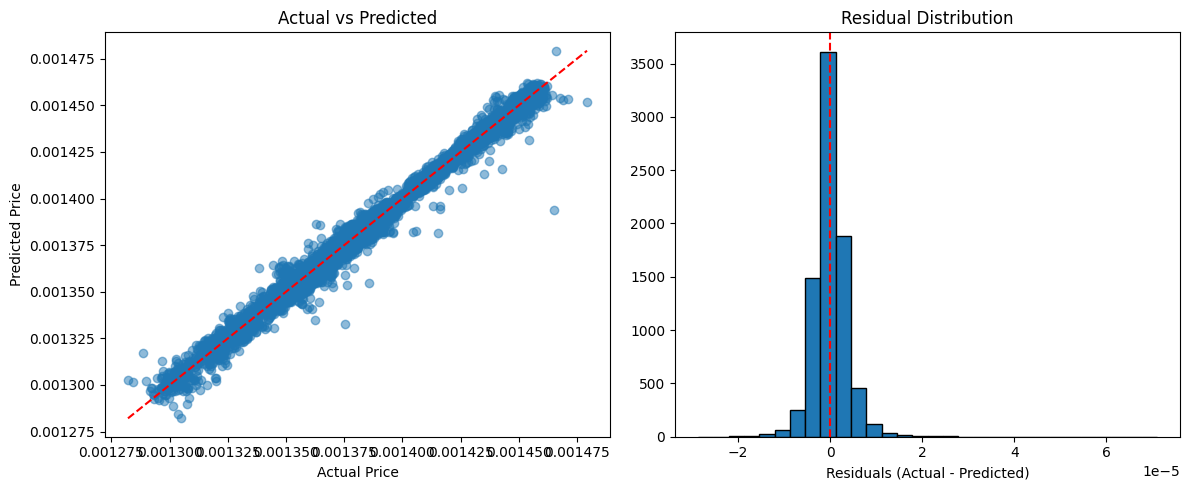


Reinforcement Learning Model Metrics:
{'MAE': 2.610487720565378e-06, 'RMSE': np.float64(3.82479308362186e-06), 'R2': 0.9904438028402744, 'Correlation': np.float64(0.9952166305193724), 'Mean Absolute % Error': np.float64(0.1887517295973318), 'directional_accuracy': np.float64(46.673349204360356)}


In [11]:
# Print evaluation metrics
# Make sure y_test is properly aligned with predictions
metrics = evaluate_regression(y_test[test_env.envs[0].window_size:test_env.envs[0].window_size + len(y_pred)], y_pred)
print("\nReinforcement Learning Model Metrics:")
print(metrics)

In [16]:
print(y_test.shape)
print(y_pred.shape)

(8032,)
(7982,)


In [21]:
y_test.head(10).values

array([0.0013942, 0.0013953, 0.0013958, 0.001396 , 0.0013968, 0.0013961,
       0.0013942, 0.001395 , 0.0013946, 0.0013944])

In [57]:
X_test[50:55, -1]

array([0.001395 , 0.0013952, 0.001394 , 0.0013928, 0.0013945])

In [20]:
y_pred[:10]

array([0.001395 , 0.0013952, 0.001394 , 0.0013928, 0.0013945, 0.0013944,
       0.0013949, 0.0013942, 0.0013939, 0.0013944], dtype=float32)

In [29]:
X_test[7]

array([0.0013931, 0.0013921, 0.0013911, 0.0013941, 0.001393 , 0.0013927,
       0.0013931, 0.001394 , 0.0013945, 0.0013945, 0.001396 , 0.0013966,
       0.0013964, 0.0013963, 0.001398 , 0.0013991, 0.0013977, 0.0013961,
       0.001396 , 0.0013958, 0.0013966, 0.0013914, 0.0013923, 0.0013912,
       0.0013906, 0.0013912, 0.0013906, 0.0013906, 0.0013916, 0.0013912,
       0.0013912, 0.0013919, 0.0013917, 0.0013916, 0.0013911, 0.0013914,
       0.0013933, 0.0013942, 0.001395 , 0.001396 , 0.001393 , 0.0013914,
       0.0013907, 0.0013917, 0.0013928, 0.0013926, 0.0013919, 0.001393 ,
       0.0013942, 0.0013953])

In [53]:
# Import vectorbt
import vectorbt as vbt

# Define trading parameters
initial_balance = 10000  # Starting capital in USD
position_size = 0.1  # Use 10% of balance per trade
stop_loss = 0.02  # 2% stop loss
take_profit = 0.03  # 3% take profit
# Convert predictions and actual prices to pandas Series

actual_current_price = y_test[N:].reset_index(drop=True)
predicted_future_price = y_test[:-N].reset_index(drop=True)

# Generate long signals when predicted price is higher than current price + 0.5%
long_signals = pd.Series(predicted_future_price > actual_current_price * 1.005).astype(int)

# Generate short signals when predicted price is lower than current price - 0.5%  
short_signals = pd.Series(predicted_future_price < actual_current_price * 0.995).astype(int)

# Combine signals: 1 for long, -1 for short, 0 for no position
signals = long_signals - short_signals

# Create portfolio simulation
pf = vbt.Portfolio.from_signals(
    actual_current_price,
    entries=signals == 1,  # Long entries
    exits=signals == -1,  # Short entries
    fees=0.001,
    slippage=0.0005,
    freq='1m'  # Assuming minute data
)

# Get trading results
results = pf.stats()

print("\nTrading Results:")
print(signals.value_counts())
print(f"Total Return: {results['Total Return [%]']}%")
print(f"Sharpe Ratio: {results['Sharpe Ratio']}")
print(f"Max Drawdown: {results['Max Drawdown [%]']}%") 
print(f"Win Rate: {results['Win Rate [%]']}%")
print(f"Expectancy: {results['Expectancy']}")
print(f"Avg Winning Trade Duration: {results['Avg Winning Trade Duration']}")
print(f"Avg Losing Trade Duration: {results['Avg Losing Trade Duration']}")
results


Trading Results:
 0    7650
-1     211
 1     166
Name: count, dtype: int64
Total Return: 1.3192292442980573%
Sharpe Ratio: 1.8332449368991808
Max Drawdown: 4.6069416724139405%
Win Rate: 60.86956521739131%
Expectancy: 0.03092994557794937
Avg Winning Trade Duration: 0 days 01:01:12.857142857
Avg Losing Trade Duration: 0 days 01:31:56.666666666


Start                                                 0
End                                                8026
Period                                  5 days 13:47:00
Start Value                                       100.0
End Value                                    101.319229
Total Return [%]                               1.319229
Benchmark Return [%]                           4.942339
Max Gross Exposure [%]                            100.0
Total Fees Paid                                9.212755
Max Drawdown [%]                               4.606942
Max Drawdown Duration                   2 days 04:37:00
Total Trades                                         47
Total Closed Trades                                  46
Total Open Trades                                     1
Open Trade PnL                                -0.103548
Win Rate [%]                                  60.869565
Best Trade [%]                                 2.897161
Worst Trade [%]                                -

In [14]:
# Import vectorbt
import vectorbt as vbt

# Define trading parameters
initial_balance = 10000  # Starting capital in USD
position_size = 0.1  # Use 10% of balance per trade
stop_loss = 0.02  # 2% stop loss
take_profit = 0.03  # 3% take profit
# Convert predictions and actual prices to pandas Series

actual_current_price = y_test[:-N - 50]
predicted_future_price = y_pred[N:]
actual_future_price = y_test[N:-50]

# Generate long signals when predicted price is higher than current price + 0.5%
long_signals = pd.Series(predicted_future_price > actual_current_price * 1.005).astype(int)

# Generate short signals when predicted price is lower than current price - 0.5%  
short_signals = pd.Series(predicted_future_price < actual_current_price * 0.995).astype(int)

# Combine signals: 1 for long, -1 for short, 0 for no position
signals = long_signals - short_signals

# Create portfolio simulation
pf = vbt.Portfolio.from_signals(
    actual_current_price,
    entries=signals == 1,  # Long entries
    exits=signals == -1,  # Short entries
    fees=0.001,
    slippage=0.0005,
    freq='1m'  # Assuming minute data
)

# Get trading results
results = pf.stats()

print("\nTrading Results:")
print(signals.value_counts())
print(f"Total Return: {results['Total Return [%]']}%")
print(f"Sharpe Ratio: {results['Sharpe Ratio']}")
print(f"Max Drawdown: {results['Max Drawdown [%]']}%") 
print(f"Win Rate: {results['Win Rate [%]']}%")
print(f"Expectancy: {results['Expectancy']}")
print(f"Avg Winning Trade Duration: {results['Avg Winning Trade Duration']}")
print(f"Avg Losing Trade Duration: {results['Avg Losing Trade Duration']}")
results


Trading Results:
 0    4869
-1    1571
 1    1537
Name: count, dtype: int64
Total Return: 50.73323695718736%
Sharpe Ratio: 43.47929172068639
Max Drawdown: 1.8696385365495929%
Win Rate: 84.61538461538461%
Expectancy: 1.3008522296714706
Avg Winning Trade Duration: 0 days 01:57:14.545454545
Avg Losing Trade Duration: 0 days 00:39:50


Start                               2025-04-06 14:47:00
End                                 2025-04-12 03:43:00
Period                                  5 days 12:57:00
Start Value                                       100.0
End Value                                    150.733237
Total Return [%]                              50.733237
Benchmark Return [%]                           3.779945
Max Gross Exposure [%]                            100.0
Total Fees Paid                                9.727925
Max Drawdown [%]                               1.869639
Max Drawdown Duration                   0 days 07:26:00
Total Trades                                         39
Total Closed Trades                                  39
Total Open Trades                                     0
Open Trade PnL                                      0.0
Win Rate [%]                                  84.615385
Best Trade [%]                                 7.299184
Worst Trade [%]                               -0

In [15]:
pf.plot().show()